<a href="https://colab.research.google.com/github/ShoOoi/MxDseminar/blob/master/B3seminar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B3 seminar
- 近年流行している深層学習（画像ベース）の技術を使用してみる
- 主にオブジェクト認識、行動認識、画像生成の3種類とする。

## 担当回
1.   YOLO algorithm
2.   Open Pose
3.   How to use Melendy Software
4.   Generative Activate Networks
5.   Yolo algorithm (Training)　時間があれば

## 1.   Open Pose
### Step.1 Mount my google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Step.2 Download the Open Pose Program.

In [0]:
cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
!git clone https://github.com/DeNA/Chainer_Realtime_Multi-Person_Pose_Estimation.git

fatal: destination path 'Chainer_Realtime_Multi-Person_Pose_Estimation' already exists and is not an empty directory.


In [0]:
cd Chainer_Realtime_Multi-Person_Pose_Estimation/

/content/drive/My Drive/Colab Notebooks/Chainer_Realtime_Multi-Person_Pose_Estimation


In [0]:
cd models

/content/drive/My Drive/Colab Notebooks/Chainer_Realtime_Multi-Person_Pose_Estimation/models


In [0]:
!wget http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/coco/pose_iter_440000.caffemodel
!wget http://posefs1.perception.cs.cmu.edu/OpenPose/models/face/pose_iter_116000.caffemodel
!wget http://posefs1.perception.cs.cmu.edu/OpenPose/models/hand/pose_iter_102000.caffemodel
!python convert_model.py posenet pose_iter_440000.caffemodel coco_posenet.npz
!python convert_model.py facenet pose_iter_116000.caffemodel facenet.npz
!python convert_model.py handnet pose_iter_102000.caffemodel handnet.npz

--2019-10-30 01:27:32--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/coco/pose_iter_440000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209274056 (200M) [text/plain]
Saving to: ‘pose_iter_440000.caffemodel.1’

pose_iter_440000.ca 100%[===================>] 199.58M  14.7MB/s    in 17s     

2019-10-30 01:27:50 (11.7 MB/s) - ‘pose_iter_440000.caffemodel.1’ saved [209274056/209274056]

--2019-10-30 01:27:51--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/face/pose_iter_116000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153717332 (147M) [text/

In [0]:
cd ..

/content/drive/My Drive/Colab Notebooks/Chainer_Realtime_Multi-Person_Pose_Estimation


In [0]:
!python pose_detector.py posenet models/coco_posenet.npz --img data/person.png --gpu 0

Loading the model...
pose_detector.py:147: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  paf_in_edge = np.hstack([paf[0][np.hsplit(integ_points, 2)], paf[1][np.hsplit(integ_points, 2)]])
Saving result into result.png...
: cannot connect to X server 


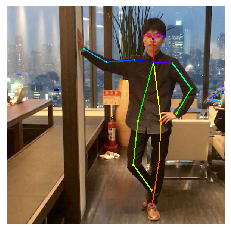

In [0]:
import cv2
import matplotlib.pyplot as plt
import os.path

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './result.png'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [0]:
!python face_detector.py facenet models/facenet.npz --img data/face.png --gpu 0

Loading FaceNet...
Saving result into result.png...


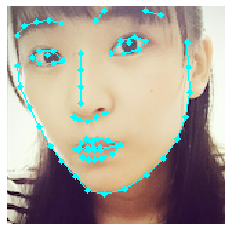

In [0]:
import cv2
import matplotlib.pyplot as plt
import os.path

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './result.png'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [0]:
!python hand_detector.py handnet models/handnet.npz --img data/hand.png --gpu 0

Loading HandNet...
Saving result into result.png...


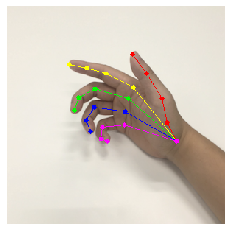

In [0]:
import cv2
import matplotlib.pyplot as plt
import os.path

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './result.png'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

In [0]:
!python demo.py --img data/dinner.png --gpu 0

Loading the model...
Loading HandNet...
Loading FaceNet...
Estimating pose...
/content/drive/My Drive/Colab Notebooks/Chainer_Realtime_Multi-Person_Pose_Estimation/pose_detector.py:147: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  paf_in_edge = np.hstack([paf[0][np.hsplit(integ_points, 2)], paf[1][np.hsplit(integ_points, 2)]])
Estimating face keypoints...
Estimating hands keypoints...
Saving result into result.png...


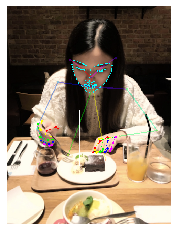

In [0]:
import cv2
import matplotlib.pyplot as plt
import os.path

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './result.png'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

ビデオに対して、OpenPoseを使ってみよう。

ビデオをアップロードして、camera_pose_demo.pyを書き換えよう

```
16行目
cap = cv2.VideoCapture(0)

cap = cv2.VideoCapture("video_name")
```


In [0]:
!python camera_pose_demo.py

時間があれば、オリジナルのモデルを作成

## 訓練手順
COCO 2017を使った訓練手順

### COCO 2017のデータをダウンロード

```
bash getData.sh
```
すでにデータセットをダウンロード済みの場合、`entity.py`中のcoco_dirにCOCOデータセットのパスを記入する。

### cocoapiのセットアップ

```
git clone https://github.com/cocodataset/cocoapi.git
cd cocoapi/PythonAPI/
make
python setup.py install
cd ../../
```

### VGG-19訓練済みモデルのダウンロード

```
wget -P models http://www.robots.ox.ac.uk/%7Evgg/software/very_deep/caffe/VGG_ILSVRC_19_layers.caffemodel
```

### マスク画像の保存
学習の際、関節点ラベルの存在しない人物に誤差を与えないためのマスク画像の計算・保存を行う。また、`vis`オプションを付加することで、各画像のアノテーション、生成されたマスクが可視化できる。

```
python gen_ignore_mask.py
```

### data generatorの確認
以下のコマンドで、generatorを使ってランダム生成された訓練用画像を確認できる。切り出し画像に対して正解のPAFとHeatmap及びmaskを被せた状態で表示される。

```
python coco_data_loader.py
```

### COCOデータセットで訓練

1000イテレーションごとに、その時点の重みパラメータが `model_iter_1000` というような重みファイルに保存される。

```
python train_coco_pose_estimation.py --gpu 0
```

### 訓練したモデルで推論

自前で訓練したモデルを使って推論処理を行う場合は、同じように以下のコマンドで訓練済み重みパラメータファイルと画像を指定すれば良い。処理結果は`result.png`という画像ファイルに保存される。

```
python pose_detector.py posenet model_iter_1000 --img data/person.png 
```
